## Random Sample Imputation
**Aim**- Random Sample imputation consists of taking random observation from the dataset and we use this observation to replace the NaN values.

**When should it be used?**
It assumes that the data is missing completely at *Random(MCAR)*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [12]:
# Percentage of null values
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [19]:
# Below line first drops all na rows in Age column and then 
# takes a random sample from the remaining values. The no of samples
# are equal to the args of sample() and here is is equal to no of null
# values
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [22]:
# Gives the index of column that are null
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [43]:
# Fill NaN values in column with the median value
# variable is the feature
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    # It will have the random sample to fill the Na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # pandas need to have same index in ordere to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    # below lines takes those rows that have null values and insert
    # random_sample values
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [44]:
median=df.Age.median()

In [45]:
median

28.0

In [46]:
impute_nan(df,'Age',median)

In [48]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


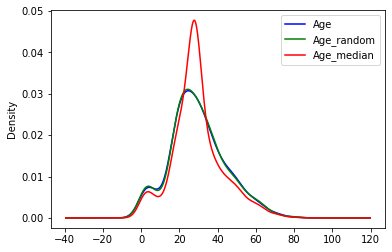

In [51]:
# Below is kernal Density estimator plot
# blue color line is real age value
# Here even though we dont have complete dataset there is no
# distortion.
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='blue')
df['Age_random'].plot(kind='kde',ax=ax,color='green')
df['Age_median'].plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages 
1. Easy to implement.
2. There is less distortion in variance.

### Disadvantages
1. Every situation randomness wont work.
